In [1]:
import numpy as np
import matplotlib.pyplot as plt
print(np.__version__)

1.16.2


In [2]:
# 原始数据样本，每个样本包含两个特征
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
# 原始数据标签
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# 数组化，样本作为训练数据的X，标签作为训练数据的y
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

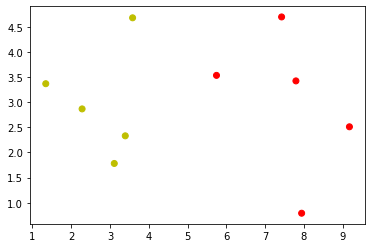

In [3]:
color_map = {0:'y',1:'r'}
color = [color_map[i] for i in y_train ]
plt.scatter(X_train[:,0],X_train[:,1], color=color)

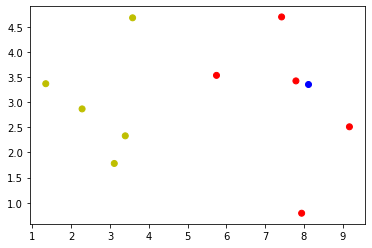

In [4]:
color_map = {0:'y',1:'r'}
color = [color_map[i] for i in y_train ]
plt.scatter(X_train[:,0],X_train[:,1], color=color)
x = np.array([8.093607318, 3.365731514])
plt.scatter(x[0],x[1],c='b')

In [5]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [6]:
x

array([8.09360732, 3.36573151])

In [7]:
X_train - x

array([[-4.70007411e+00, -1.03445813e+00],
       [-4.98353384e+00, -1.58419188e+00],
       [-6.74979849e+00,  2.62944000e-03],
       [-4.51131328e+00,  1.31344760e+00],
       [-5.81324488e+00, -4.98741251e-01],
       [-6.70170376e-01,  1.33079136e+00],
       [-2.34855532e+00,  1.68258289e-01],
       [ 1.07856130e+00, -8.54630469e-01],
       [-3.00823837e-01,  5.83574270e-02],
       [-1.53786501e-01, -2.57409428e+00]])

In [8]:
np.square(X_train-x)

array([[2.20906966e+01, 1.07010363e+00],
       [2.48356095e+01, 2.50966390e+00],
       [4.55597796e+01, 6.91395471e-06],
       [2.03519475e+01, 1.72514459e+00],
       [3.37938160e+01, 2.48742835e-01],
       [4.49128333e-01, 1.77100565e+00],
       [5.51571210e+00, 2.83108518e-02],
       [1.16329449e+00, 7.30393239e-01],
       [9.04949809e-02, 3.40558929e-03],
       [2.36502879e-02, 6.62596138e+00]])

In [9]:
np.sum(np.square(X_train-x), axis=1)

array([23.16080024, 27.34527338, 45.55978653, 22.07709206, 34.04255886,
        2.22013398,  5.54402295,  1.89368773,  0.09390057,  6.64961167])

In [10]:
distances = np.sqrt(np.sum(np.square(X_train-x),axis=1))
distances

array([4.81256691, 5.22927083, 6.749799  , 4.69862661, 5.83460015,
       1.4900114 , 2.3545749 , 1.37611327, 0.306432  , 2.5786841 ])

In [11]:
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2])

In [12]:
y_train[np.argsort(distances)]

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [13]:
k = 6
topK_y = y_train[np.argsort(distances)][:k]

In [14]:
topK_y

array([1, 1, 1, 1, 1, 0])

In [15]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [16]:
votes.most_common()

[(1, 5), (0, 1)]

In [17]:
predict_y = votes.most_common()[0][0]

In [18]:
# 将以上过程整理
import numpy as np
from collections import Counter
k = 6
# 计算x与X_train中各个样本的距离，距离采用欧式距离
# 注意广播计算的计算方法
distances = np.sqrt(np.sum(np.square(X_train-x),axis=1))

# 计算与x距离最近的前K样本的标签
# 注意argsort排序后返回的不是值，而是值在原来数组中的索引
topK_y = y_train[np.argsort(distances)][:k]

# 计算前K样本标签中最多的标签
# 注意collections.Counter的用法
votes = Counter(topK_y)
predict_y = votes.most_common(1)[0][0]

## 使用scikit-learn中的KNN算法

In [3]:
from sklearn.neighbors import KNeighborsClassifier